In [40]:
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')
# Loading data
orders = pd.read_csv('/Users/aditireddydoma/Desktop/orders.csv')
order_prior = pd.read_csv('/Users/aditireddydoma/Desktop/order_products__prior copy.csv')
products = pd.read_csv('/Users/aditireddydoma/Desktop/products.csv')
departments = pd.read_csv('/Users/aditireddydoma/Desktop/departments.csv')
aisles = pd.read_csv('/Users/aditireddydoma/Desktop/aisles.csv')

In [2]:
# Checking for missing values 
print("Missing values in 'orders':\n", orders.isna().sum(), "\n")
print("Missing values in 'order_prior':\n", order_prior.isna().sum(), "\n")
print("Missing values in 'products':\n", products.isna().sum(), "\n")
print("Missing values in 'departments':\n", departments.isna().sum(), "\n")
print("Missing values in 'aisles':\n", aisles.isna().sum(), "\n")


Missing values in 'orders':
 order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64 

Missing values in 'order_prior':
 order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64 

Missing values in 'products':
 product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64 

Missing values in 'departments':
 department_id    0
department       0
dtype: int64 

Missing values in 'aisles':
 aisle_id    0
aisle       0
dtype: int64 



In [3]:
# Fill missing values in days_since_prior_order with 0
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)


Top 5 First Products Added First to Cart:
product_name
Banana                    110916
Bag of Organic Bananas     78988
Organic Whole Milk         30927
Organic Strawberries       27975
Organic Hass Avocado       24116
Name: count, dtype: int64


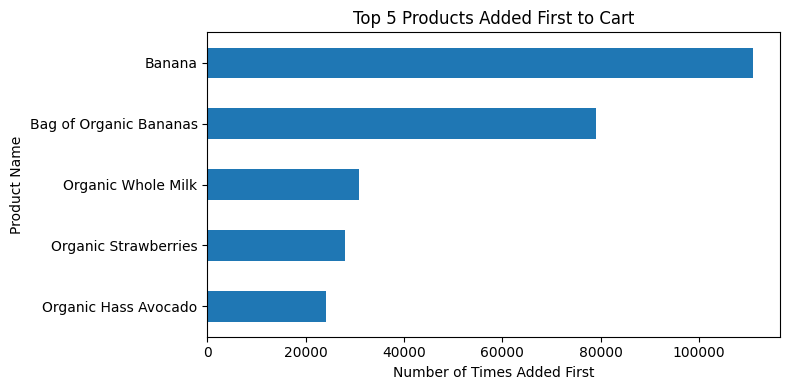

In [4]:
# Top 5 products added first in cart 
order_prior['product_id'] = order_prior['product_id'].astype(int)
products['product_id'] = products['product_id'].astype(int)

# Merge
first_added = order_prior[order_prior['add_to_cart_order'] == 1]

if 'product_name' in products.columns:
    first_added_named = first_added.merge(products[['product_id', 'product_name']], on='product_id', how='left')

    if 'product_name' in first_added_named.columns:
        top_first_added = first_added_named['product_name'].value_counts().head(5)
        print("Top 5 First Products Added First to Cart:")
        print(top_first_added)

# Bar Plot
        import matplotlib.pyplot as plt
        top_first_added.plot(kind='barh', title='Top 5 Products Added First to Cart', figsize=(8,4))
        plt.gca().invert_yaxis()
        plt.xlabel("Number of Times Added First")
        plt.ylabel("Product Name")
        plt.tight_layout()
        plt.show()



In [5]:
# Top 10 product pairs that are most frequently purchased together
from itertools import combinations
from collections import Counter

# Merge product_name into order_prior
order_prior = order_prior.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Group by 
grouped_orders = order_prior.groupby('order_id')['product_name'].apply(list)

# Count product pairs
pair_counter = Counter()

for products_in_order in grouped_orders:
    filtered_items = [item for item in products_in_order if isinstance(item, str)]  # remove NaN
    unique_items = sorted(set(filtered_items))  # remove duplicates
    pairs = combinations(unique_items, 2)
    pair_counter.update(pairs)

# DataFrame
pair_df = pd.DataFrame(pair_counter.items(), columns=['pair', 'purchase_count'])

# Top 10 pairs
top_10_pairs = pair_df.sort_values(by='purchase_count', ascending=False).head(10)
print("Top 10 Product Pairs Frequently Purchased Together:\n")
for index, row in top_10_pairs.iterrows():
    print(f"{row['pair'][0]} + {row['pair'][1]} → {row['purchase_count']} times")

Top 10 Product Pairs Frequently Purchased Together:

Bag of Organic Bananas + Organic Hass Avocado → 62341 times
Bag of Organic Bananas + Organic Strawberries → 61628 times
Banana + Organic Strawberries → 56156 times
Banana + Organic Avocado → 53395 times
Banana + Organic Baby Spinach → 51395 times
Bag of Organic Bananas + Organic Baby Spinach → 50372 times
Banana + Strawberries → 41232 times
Banana + Large Lemon → 40880 times
Organic Hass Avocado + Organic Strawberries → 40794 times
Bag of Organic Bananas + Organic Raspberries → 40503 times


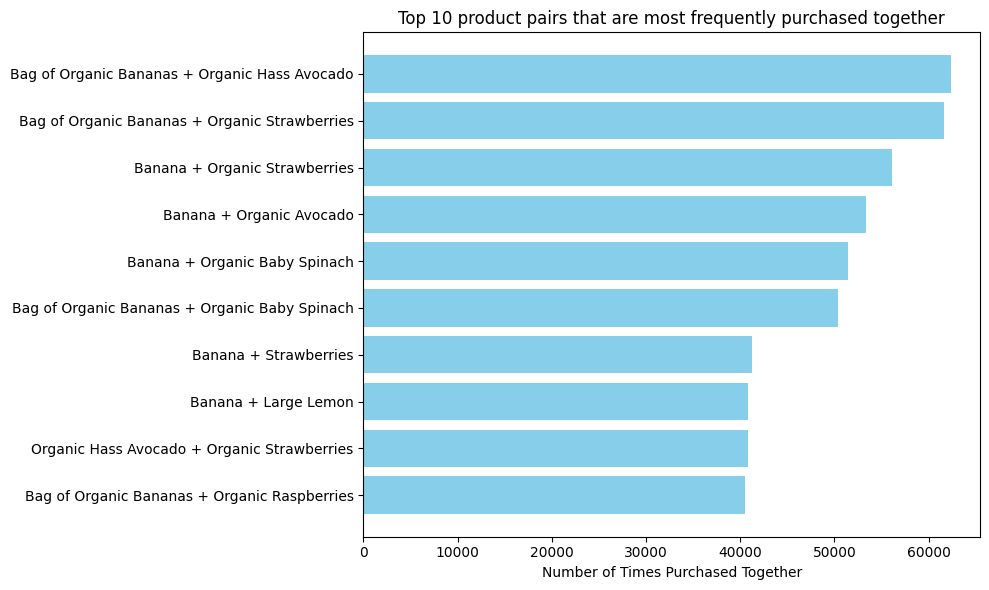

In [6]:
# BarPlot for Top 10 product pairs that are most frequently purchased together
import matplotlib.pyplot as plt

top_10_pairs['pair_label'] = top_10_pairs['pair'].apply(lambda x: f"{x[0]} + {x[1]}")

plt.figure(figsize=(10, 6))
plt.barh(top_10_pairs['pair_label'], top_10_pairs['purchase_count'], color='skyblue')
plt.xlabel('Number of Times Purchased Together')
plt.title('Top 10 product pairs that are most frequently purchased together')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()


   product_id  reorder_count            product_name
0       24852         398609                  Banana
1       13176         315913  Bag of Organic Bananas
2       21137         205845    Organic Strawberries
3       21903         186884    Organic Baby Spinach
4       47209         170131    Organic Hass Avocado
5       47766         134044         Organic Avocado
6       27845         114510      Organic Whole Milk
7       47626         106255             Large Lemon
8       27966         105409     Organic Raspberries
9       16797          99802            Strawberries


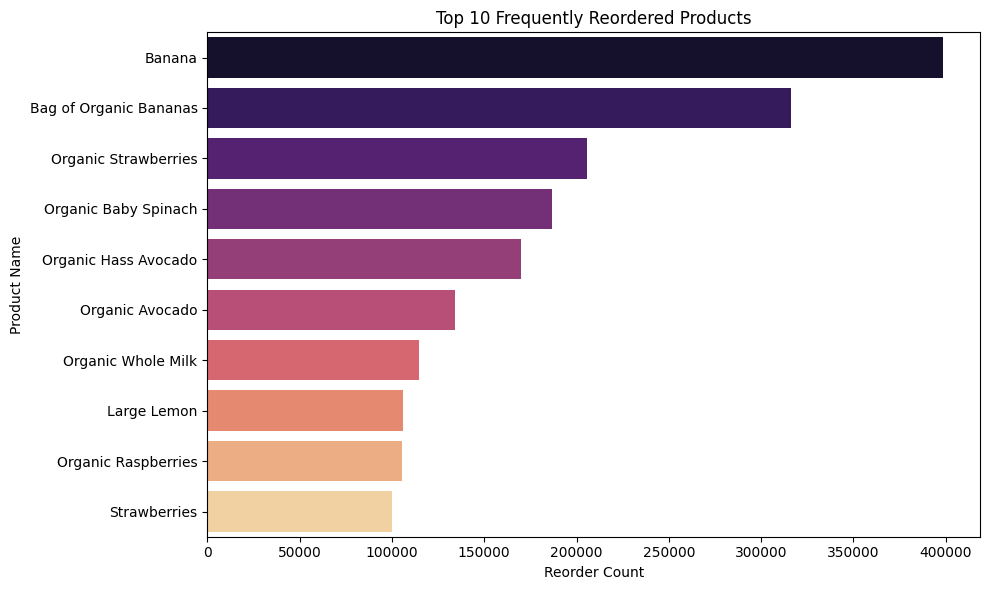

In [7]:
import seaborn as sns

if 'product_name' in order_prior.columns:
    order_prior = order_prior.drop(columns=['product_name'])

# Merge product names
order_prior = order_prior.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Top reordered products 
top_reordered = (
    order_prior[order_prior['reordered'] == 1]['product_id']
    .value_counts()
    .head(10)
    .reset_index()
)
top_reordered.columns = ['product_id', 'reorder_count']

top_reordered = top_reordered.merge(products[['product_id', 'product_name']], on='product_id', how='left')
print(top_reordered)
# BarPlot 
plt.figure(figsize=(10, 6))
sns.barplot(data=top_reordered, x='reorder_count', y='product_name', palette='magma')
plt.title('Top 10 Frequently Reordered Products')
plt.xlabel('Reorder Count')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()



Number of Orders by Day of Week:
Sunday (0) : 600905 orders
Monday (1) : 587478 orders
Tuesday (2) : 467260 orders
Wednesday (3) : 436972 orders
Thursday (4) : 426339 orders
Friday (5) : 453368 orders
Saturday (6) : 448761 orders


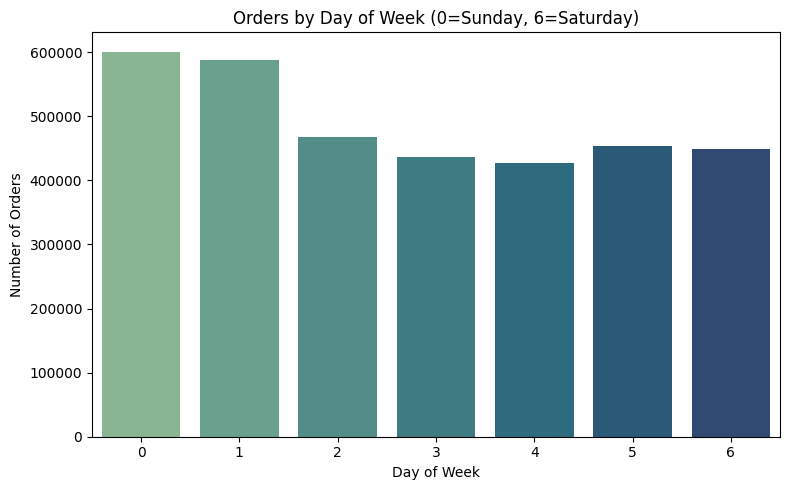

In [8]:
# Orders by day of week
order_dow = orders['order_dow'].value_counts().sort_index()
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
print("Number of Orders by Day of Week:")
for dow, count in order_dow.items():
    print(f"{day_names[dow]} ({dow}) : {count} orders")

#BarPlot 
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(x=order_dow.index, y=order_dow.values, palette='crest')
plt.title('Orders by Day of Week (0=Sunday, 6=Saturday)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

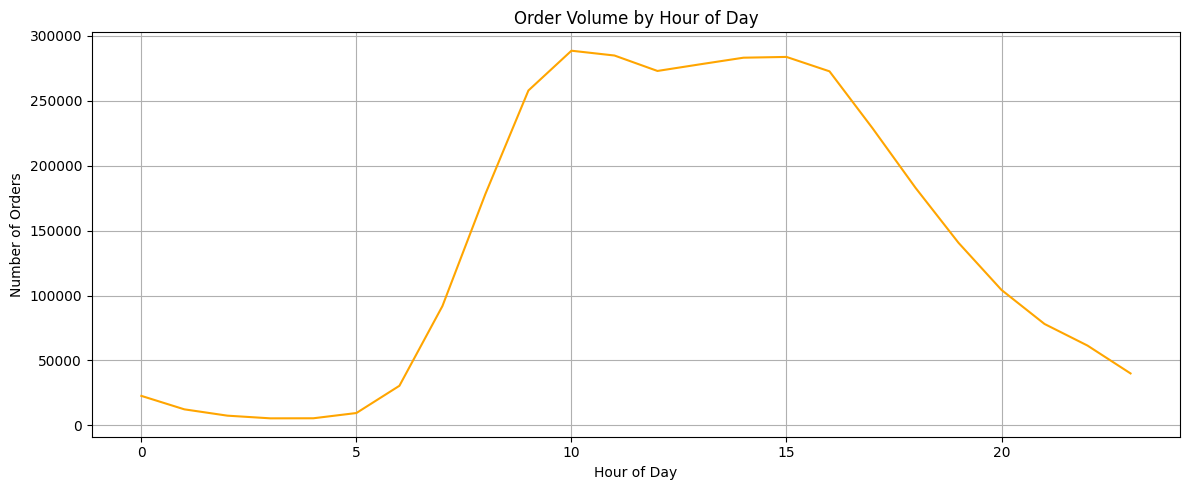

In [9]:
# Orders by hour of day
order_hour = orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=order_hour.index, y=order_hour.values, color='orange')
plt.title('Order Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()

Average reorder gap across users: 13.43


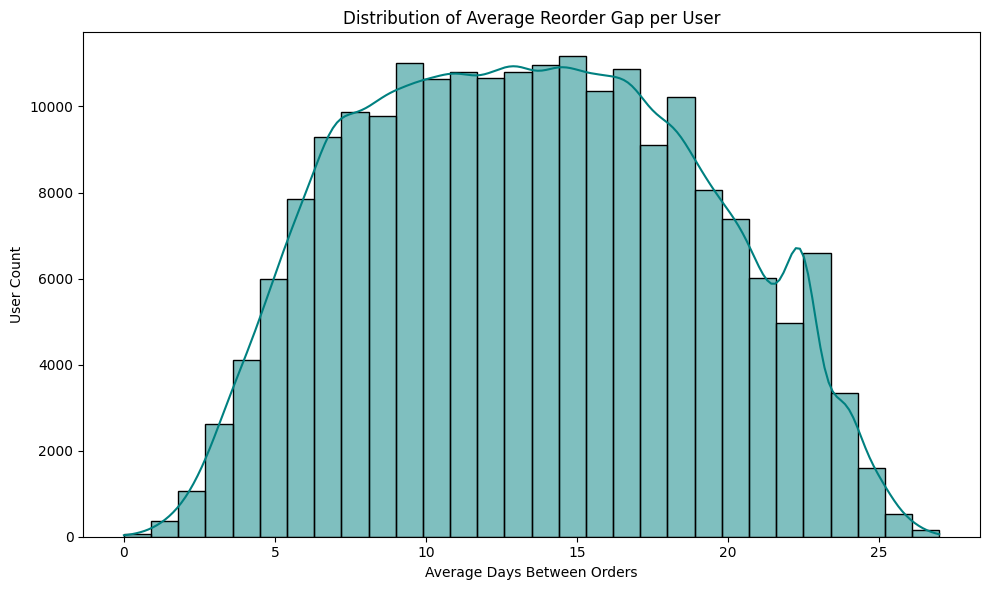

In [10]:
# Average day gap between orders
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)
avg_reorder_gap = orders.groupby('user_id')['days_since_prior_order'].mean()

print("Average reorder gap across users:", round(avg_reorder_gap.mean(), 2))

# Plot distribution of reorder gaps
plt.figure(figsize=(10,6))
sns.histplot(avg_reorder_gap, bins=30, kde=True, color='teal')
plt.title('Distribution of Average Reorder Gap per User')
plt.xlabel('Average Days Between Orders')
plt.ylabel('User Count')
plt.tight_layout()
plt.show()

In [11]:
#Top 3 product names by day & time slot
# Merge product and order info
if 'product_name' in order_prior.columns:
    order_prior = order_prior.drop(columns=['product_name'])

order_prior_time = order_prior.merge(
    orders[['order_id', 'order_dow', 'order_hour_of_day']], on='order_id', how='left'
).merge(
    products[['product_id', 'product_name']], on='product_id', how='left'
)

# Column for time slot
def time_slot(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour <= 23:
        return 'Evening'
    else:
        return 'Night'

order_prior_time['time_slot'] = order_prior_time['order_hour_of_day'].apply(time_slot)

# oCunts per product for each day and time slot
top_products_by_time = (
    order_prior_time.groupby(['order_dow', 'time_slot', 'product_name'])
    .size()
    .reset_index(name='count')
    .sort_values(['order_dow', 'time_slot', 'count'], ascending=[True, True, False])
)

# Top 3 
top3_per_slot = top_products_by_time.groupby(['order_dow', 'time_slot']).head(3)

days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i in range(7):  
    print(f"\n{days[i]}")
    day_data = top3_per_slot[top3_per_slot['order_dow'] == i]
    for slot in ['Morning', 'Afternoon', 'Evening', 'Night']:
        slot_data = day_data[day_data['time_slot'] == slot]
        if not slot_data.empty:
            print(f"\n{slot}")
            for idx, row in slot_data.iterrows():
                print(f"    {row['product_name']} (ordered {row['count']} times)")



Sunday

Morning
    Banana (ordered 30824 times)
    Bag of Organic Bananas (ordered 22185 times)
    Organic Baby Spinach (ordered 17849 times)

Afternoon
    Banana (ordered 48389 times)
    Bag of Organic Bananas (ordered 35321 times)
    Organic Baby Spinach (ordered 27339 times)

Evening
    Banana (ordered 16140 times)
    Bag of Organic Bananas (ordered 12838 times)
    Organic Strawberries (ordered 9800 times)

Night
    Banana (ordered 1416 times)
    Bag of Organic Bananas (ordered 1149 times)
    Organic Baby Spinach (ordered 870 times)

Monday

Morning
    Banana (ordered 35353 times)
    Bag of Organic Bananas (ordered 27497 times)
    Organic Strawberries (ordered 17289 times)

Afternoon
    Banana (ordered 37890 times)
    Bag of Organic Bananas (ordered 30564 times)
    Organic Strawberries (ordered 20896 times)

Evening
    Banana (ordered 13227 times)
    Bag of Organic Bananas (ordered 10423 times)
    Organic Strawberries (ordered 7384 times)

Night
    Banana (ord

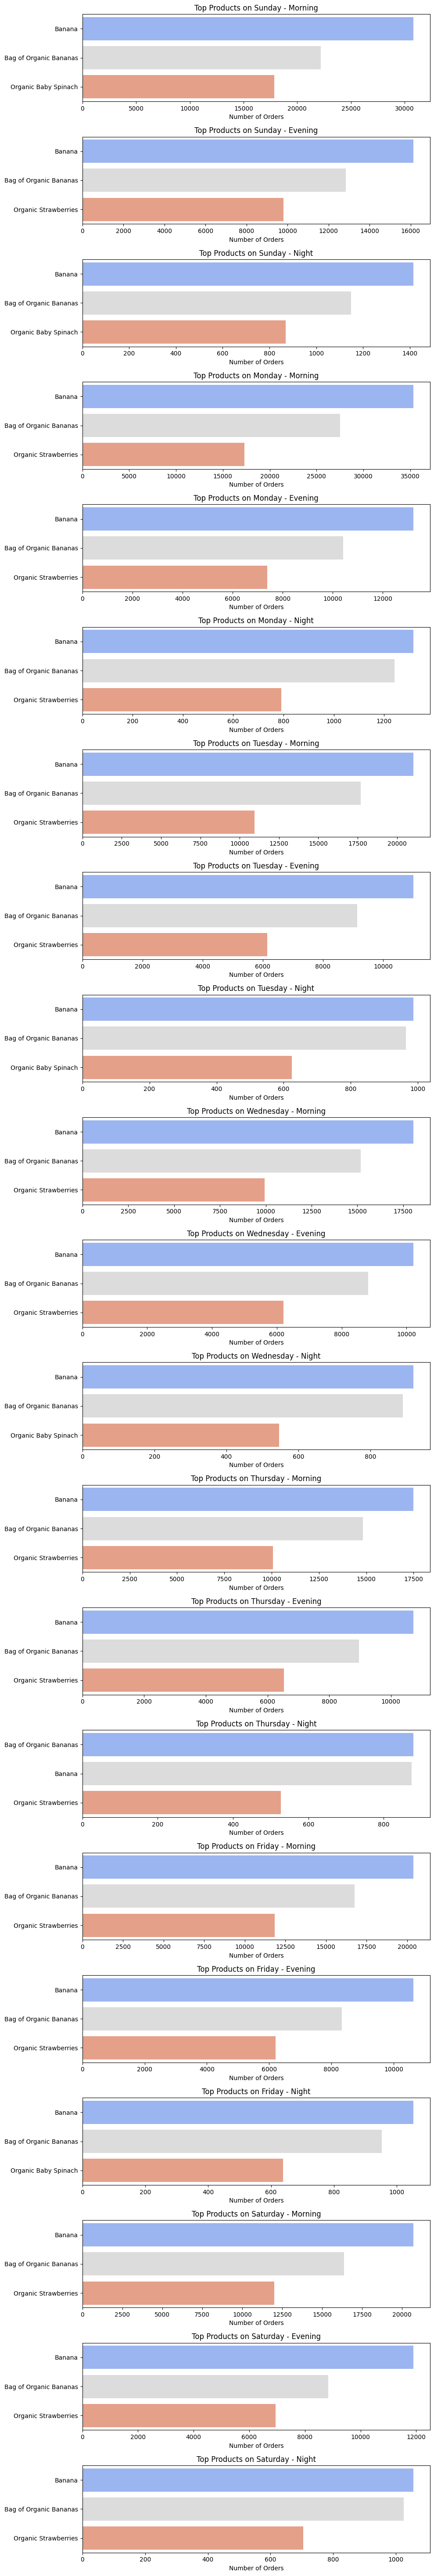

In [12]:
# Plot for Top 3 product names by day & time slot
import seaborn as sns
import matplotlib.pyplot as plt

# Map order_dow to day name
top3_per_slot['day_name'] = top3_per_slot['order_dow'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
    3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

# Order of time slots
ordered_slots = ['Morning', 'Evening', 'Night']
top3_per_slot = top3_per_slot[top3_per_slot['time_slot'].isin(ordered_slots)]
top3_per_slot['time_slot'] = pd.Categorical(top3_per_slot['time_slot'], categories=ordered_slots, ordered=True)

# Combine day and time for clean subplots
top3_per_slot['day_time'] = top3_per_slot['day_name'] + " - " + top3_per_slot['time_slot'].astype(str)

# Sort by weekday order
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
top3_per_slot['day_name'] = pd.Categorical(top3_per_slot['day_name'], categories=day_order, ordered=True)
top3_per_slot = top3_per_slot.sort_values(['day_name', 'time_slot', 'count'], ascending=[True, True, False])

# Plot each subplot
unique_combinations = top3_per_slot['day_time'].unique()
n = len(unique_combinations)
fig, axes = plt.subplots(nrows=n, figsize=(10, n * 2.8))

for i, slot in enumerate(unique_combinations):
    ax = axes[i]
    data = top3_per_slot[top3_per_slot['day_time'] == slot]
    sns.barplot(data=data, x='count', y='product_name', ax=ax, palette='coolwarm')
    ax.set_title(f"Top Products on {slot}", fontsize=12)
    ax.set_xlabel("Number of Orders")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()


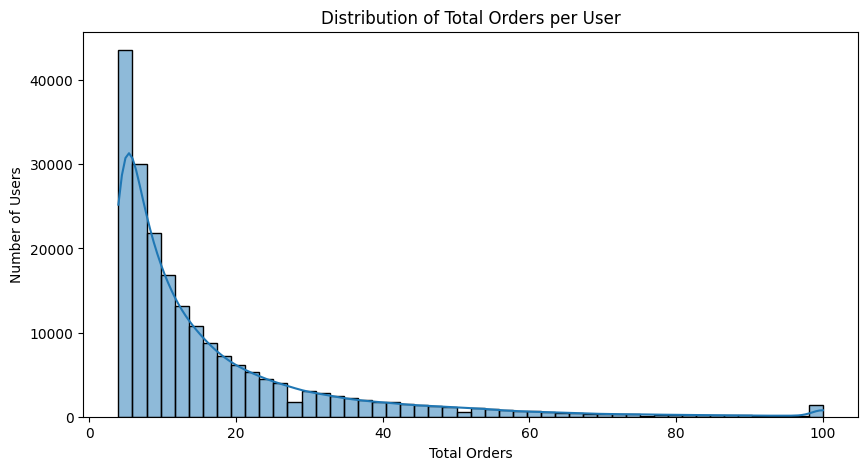

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total orders per user
user_orders = orders.groupby('user_id')['order_id'].count().reset_index(name='total_orders')

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.histplot(user_orders['total_orders'], bins=50, kde=True)
plt.title('Distribution of Total Orders per User')
plt.xlabel('Total Orders')
plt.ylabel('Number of Users')
plt.show()


In [14]:
# Customer segemntation based on shopping behaviour
# Spending Segmentation
# Total orders per user
user_orders = orders.groupby('user_id')['order_id'].count().reset_index(name='total_orders')

# Qquantile thresholds
q75 = user_orders['total_orders'].quantile(0.75)
q90 = user_orders['total_orders'].quantile(0.90)

# Segmentation
def spending_segment(x):
    if x >= q90:
        return 'High Spender'
    elif x >= q75:
        return 'Medium Spender'
    else:
        return 'Low Spender'

user_orders['spending_category'] = user_orders['total_orders'].apply(spending_segment)
print(user_orders['spending_category'].value_counts())


spending_category
Low Spender       152278
Medium Spender     33287
High Spender       20644
Name: count, dtype: int64


In [15]:
# Identifying inactive customers
# Group by user and get maximum days since prior order
inactive_df = orders.groupby('user_id')['days_since_prior_order'].max().reset_index()
inactive_df.rename(columns={'days_since_prior_order': 'max_days_since_prior'}, inplace=True)

# Filter customers with 30+ days or missing data
inactive_customers = inactive_df[
    (inactive_df['max_days_since_prior'] >= 30) | (inactive_df['max_days_since_prior'].isnull())
]

# Count of inactive customers
print("Number of inactive customers in the last 30 days:", inactive_customers['user_id'].nunique())
inactive_customers.head()

Number of inactive customers in the last 30 days: 152012


,user_id,max_days_since_prior
0,1,30.0
1,2,30.0
3,4,30.0
6,7,30.0
7,8,30.0


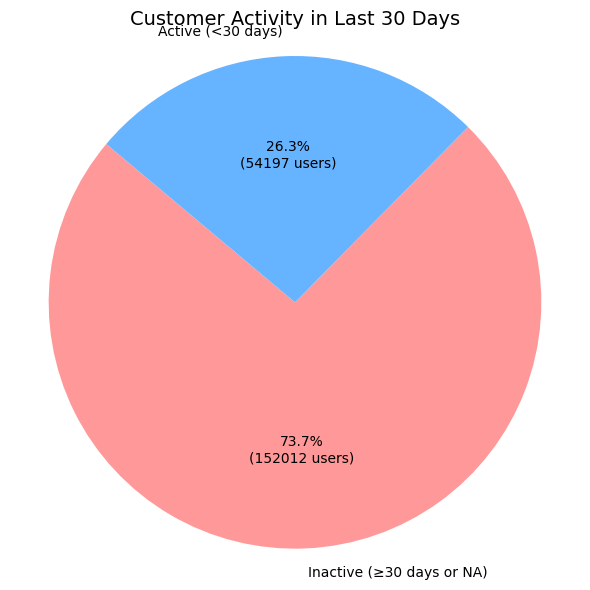

In [16]:
# Pie-Chart for inactive customers 

# Group by user and get maximum days since prior order)
inactive_df = orders.groupby('user_id')['days_since_prior_order'].max().reset_index()
inactive_df.rename(columns={'days_since_prior_order': 'max_days_since_prior'}, inplace=True)

# Filter customers with 30+ days or missing data
inactive_customers = inactive_df[
    (inactive_df['max_days_since_prior'] >= 30) | (inactive_df['max_days_since_prior'].isnull())
]

# Count
inactive_count = inactive_customers['user_id'].nunique()
active_count = inactive_df['user_id'].nunique() - inactive_count
counts = [inactive_count, active_count]
labels = ['Inactive (≥30 days or NA)', 'Active (<30 days)']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p/100.*sum(counts))} users)', 
        startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Customer Activity in Last 30 Days', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [17]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import NearestNeighbors
from xgboost import XGBClassifier
from scipy.sparse import csr_matrix

In [18]:
# Feature Engineering
order_data = order_prior.merge(orders, on='order_id')
cart_avg = order_data.groupby(['user_id', 'product_id'])['add_to_cart_order'].mean().reset_index()
cart_avg.rename(columns={'add_to_cart_order': 'avg_cart_position'}, inplace=True)
order_data = order_data.merge(cart_avg, on=['user_id', 'product_id'], how='left')
order_data['avg_cart_position'] = order_data['avg_cart_position'].fillna(order_data['add_to_cart_order'])


In [19]:
# Final feature set
order_data = order_data[['user_id', 'product_id', 'order_dow', 'order_hour_of_day',
                         'days_since_prior_order', 'add_to_cart_order', 'avg_cart_position', 'reordered']]
X = order_data.drop(columns=['user_id', 'product_id', 'reordered']).fillna(0)
y = order_data['reordered'].fillna(0).astype(int)
user_product_ref = order_data[['user_id', 'product_id']]

In [20]:
# Train - Test Split
X_train, X_test, y_train, y_test, user_product_train, user_product_test = train_test_split(
    X, y, user_product_ref, test_size=0.2, random_state=42)


In [21]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# XGBoost Model 
model = XGBClassifier(n_estimators=450, max_depth=6, learning_rate=0.025,
                      subsample=0.9, colsample_bytree=0.9,
                      scale_pos_weight=5.5, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.025, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=450, n_jobs=None,
              num_parallel_tree=None, ...)

In [23]:
# Predictions
y_proba = model.predict_proba(X_test_scaled)[:, 1]
threshold = 0.98
X_test_copy = X_test.copy()
X_test_copy['reorder_prob'] = y_proba
X_test_copy['actual'] = y_test.values
X_test_copy['user_id'] = user_product_test['user_id'].values
X_test_copy['product_id'] = user_product_test['product_id'].values
X_test_copy['recommend'] = (X_test_copy['reorder_prob'] > threshold) & (X_test_copy['days_since_prior_order'] >= 5)


In [24]:
# Sparse Matrix for Nearest Neighbors
order_data['interaction'] = 1
user_index = {u: i for i, u in enumerate(order_data['user_id'].unique())}
product_index = {p: i for i, p in enumerate(order_data['product_id'].unique())}
row_idx = order_data['user_id'].map(user_index)
col_idx = order_data['product_id'].map(product_index)
sparse_user_product_matrix = csr_matrix((order_data['interaction'], (row_idx, col_idx)),
                                        shape=(len(user_index), len(product_index)))

knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(sparse_user_product_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [25]:
# Recommendations 
recommendation_system = []
sample_users = X_test_copy['user_id'].drop_duplicates().sample(100, random_state=42)
X_test_sample = X_test_copy[X_test_copy['user_id'].isin(sample_users)]

for user_id in X_test_sample['user_id'].unique():
    if user_id not in user_index:
        continue
    user_row = user_index[user_id]
    _, indices = knn.kneighbors(sparse_user_product_matrix[user_row], n_neighbors=4)
    similar_users = [list(user_index.keys())[i] for i in indices.flatten()[1:]]
    top_similar_products = order_data[order_data['user_id'].isin(similar_users)]['product_id'].value_counts().head(10).index
    user_suggestions = X_test_sample[(X_test_sample['user_id'] == user_id) &
                                     (X_test_sample['product_id'].isin(top_similar_products)) &
                                     (X_test_sample['recommend'])]
    recommendation_system.append(user_suggestions)

recommendation_final = pd.concat(recommendation_system).drop_duplicates(subset=['user_id', 'product_id'])
recommendation_final = recommendation_final.merge(products[['product_id', 'product_name']], on='product_id', how='left')


In [26]:
# Recommendations by Promotion Message
user_orders = orders.groupby('user_id')['order_id'].count().reset_index(name='total_orders')
q75 = user_orders['total_orders'].quantile(0.75)
q90 = user_orders['total_orders'].quantile(0.90)

def spending_segment(x):
    if x >= q90:
        return 'High Spender'
    elif x >= q75:
        return 'Medium Spender'
    else:
        return 'Low Spender'

user_orders['spending_category'] = user_orders['total_orders'].apply(spending_segment)
user_orders = user_orders.drop_duplicates(subset=['user_id'])
recommendation_final = recommendation_final.drop(columns=[col for col in recommendation_final.columns if 'spending_category' in col], errors='ignore')
recommendation_final = recommendation_final.merge(user_orders[['user_id', 'spending_category']], on='user_id', how='left')

recommendation_final['promotion'] = recommendation_final['spending_category'].apply(
    lambda x: "Loyalty Bonus: Save more on your next order!" if x == 'High Spender'
    else ("Special Deal: Limited-time bundle for you!" if x == 'Medium Spender'
          else "Try reordering essentials at a discount!"))






In [30]:
# Recommendation for Inactive suggestions 

order_data = order_data.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Time slot creation
order_data['time_slot'] = order_data['order_hour_of_day'].apply(
    lambda h: 'Morning' if 6 <= h < 12 else 'Afternoon' if 12 <= h < 18 else 'Evening' if 18 <= h <= 23 else 'Night'
)
order_data['order_dow'] = order_data['order_dow'].astype(int)

top_products_by_time = order_data.groupby(['order_dow', 'time_slot', 'product_name']) \
                                 .size().reset_index(name='count')
top3_per_slot = top_products_by_time.sort_values(['order_dow', 'time_slot', 'count'], ascending=[True, True, False]) \
                                    .groupby(['order_dow', 'time_slot']).head(3)

# Current context
current_hour = pd.Timestamp.now().hour
current_day = pd.Timestamp.now().dayofweek
time_now = 'Morning' if 6 <= current_hour < 12 else 'Afternoon' if 12 <= current_hour < 18 else 'Evening' if 18 <= current_hour <= 23 else 'Night'

# Suggestions
inactive_suggestions = top3_per_slot[
    (top3_per_slot['order_dow'] == current_day) &
    (top3_per_slot['time_slot'] == time_now)
]



In [32]:
# Printing recoomendations 
# XGBoost Reorder Recommendations
reorder_df = recommendation_final.copy()
reorder_df = reorder_df[['user_id', 'product_id', 'product_name', 'promotion']]

# Collaborative Filtering (KNN)
collab_df = pd.concat(recommendation_system).drop_duplicates(subset=['user_id', 'product_id'])
collab_df = collab_df.merge(products[['product_id', 'product_name']], on='product_id', how='left')
collab_df['promotion'] = '👥 Inspired by similar users'
collab_df = collab_df[['user_id', 'product_id', 'product_name', 'promotion']]

# Customer Segmentation
loyalty_df = recommendation_final.copy()
loyalty_df = loyalty_df[['user_id', 'product_id', 'product_name', 'promotion']]

# Inactive User Suggestions
inactive_df = inactive_suggestions.copy()
inactive_df['user_id'] = ['InactiveUser_' + str(i+1) for i in range(len(inactive_df))]
inactive_df['product_id'] = 'N/A'
inactive_df['promotion'] = '⏰ Popular this hour'
inactive_df = inactive_df[['user_id', 'product_name', 'product_id', 'promotion']]
inactive_df = inactive_df[['user_id', 'product_id', 'product_name', 'promotion']]

# Combine All
final_recommendations_all = pd.concat([reorder_df, collab_df, loyalty_df, inactive_df], ignore_index=True)

# Display Neatly
print("Recommendations:")
print(final_recommendations_all[['user_id', 'product_id', 'product_name', 'promotion']].head(25))


📦 Multi-User Recommendations (All Systems):
   user_id product_id                                      product_name  \
0    83407      21137                              Organic Strawberries   
1   148940      36011                             Organic Fat Free Milk   
2   148940      13176                            Bag of Organic Bananas   
3   148940      21137                              Organic Strawberries   
4   105748      13176                            Bag of Organic Bananas   
5   147761      21903                              Organic Baby Spinach   
6   205943      45066                                  Honeycrisp Apple   
7   205943      41488                                    Chocolate Milk   
8    82085      24852                                            Banana   
9   199305      30169           Total 2% All Natural Plain Greek Yogurt   
10  199305      49131                       Smoked Turkey Breast Slices   
11  108199      24852                                   

In [77]:
#Recommendations
# Reorder Recommendations (XGBoost)
xgb_unique_users = recommendation_final.drop_duplicates(subset=['user_id'])
reorder_df = xgb_unique_users[['user_id', 'product_id', 'product_name', 'promotion']]
reorder_df.rename(columns={'promotion': 'message'}, inplace=True)

# Collaborative Filtering (KNN)
collab_unique_users = pd.concat(recommendation_system).drop_duplicates(subset=['user_id'])
collab_df = collab_unique_users.merge(products[['product_id', 'product_name']], on='product_id', how='left')
collab_df['message'] = '👥 Popular among similar users'
collab_df = collab_df[['user_id', 'product_id', 'product_name', 'message']]

# Customer Segmentation 
loyalty_unique_users = recommendation_final.drop_duplicates(subset=['user_id'])
loyalty_df = loyalty_unique_users[['user_id', 'product_id', 'product_name', 'promotion']]
loyalty_df.rename(columns={'promotion': 'message'}, inplace=True)

# Inactive User Suggestions ( Based on Current Day and Time)
if 'product_name' not in order_data.columns:
    order_data = order_data.merge(products[['product_id', 'product_name']], on='product_id', how='left')

order_data['time_slot'] = order_data['order_hour_of_day'].apply(
    lambda h: 'Morning' if 6 <= h < 12 else 'Afternoon' if 12 <= h < 18 else 'Evening' if 18 <= h <= 23 else 'Night')
order_data['order_dow'] = order_data['order_dow'].astype(int)

# Top products by popularity in each time slot and day
top_products_by_time = order_data.groupby(['order_dow', 'time_slot', 'product_name']) \
                                 .size().reset_index(name='count')
top3_per_slot = top_products_by_time.sort_values(['order_dow', 'time_slot', 'count'], ascending=[True, True, False]) \
                                    .groupby(['order_dow', 'time_slot']).head(3)

# Current time context
now = datetime.datetime.now()
current_day = now.weekday()
current_hour = now.hour

def get_time_slot(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour <= 23:
        return 'Evening'
    else:
        return 'Night'

slot_now = get_time_slot(current_hour)
inactive_now = top3_per_slot[
    (top3_per_slot['order_dow'] == current_day) &
    (top3_per_slot['time_slot'] == slot_now)
].reset_index(drop=True)


if inactive_now.empty:
    inactive_now = top_products_by_time.sort_values(by='count', ascending=False).head(3)

inactive_users_df = pd.DataFrame({
    'user_id': [f'InactiveUser_{i+1}' for i in range(len(inactive_now))],
    'product_id': 'N/A',
    'product_name': inactive_now['product_name'],
    'message': ['Order now — it’s popular at this time!' for _ in range(len(inactive_now))]
})

# Combine 
final_recommendations_all = pd.concat(
    [reorder_df, collab_df, loyalty_df, inactive_users_df],
    ignore_index=True
)

# Show Top 25 + Inactive Users
print("\nFinal Recommendations (Top 25 + Inactive Users):")
real_user_recommendations = final_recommendations_all[
    ~final_recommendations_all['user_id'].astype(str).str.startswith('InactiveUser')
].drop_duplicates(subset=['user_id']).head(20)

inactive_user_recommendations = final_recommendations_all[
    final_recommendations_all['user_id'].astype(str).str.startswith('InactiveUser')
]

combined_display = pd.concat([real_user_recommendations, inactive_user_recommendations], ignore_index=True)
print(combined_display[['user_id', 'product_name', 'message']])

print("\nInactive User Recommendations:")
print(inactive_user_recommendations[['user_id', 'product_name', 'message']])



Final Recommendations (Top 25 + Inactive Users):
           user_id                                      product_name  \
0            83407                              Organic Strawberries   
1           148940                             Organic Fat Free Milk   
2           105748                            Bag of Organic Bananas   
3           147761                              Organic Baby Spinach   
4           205943                                  Honeycrisp Apple   
5            82085                                            Banana   
6           199305           Total 2% All Natural Plain Greek Yogurt   
7           108199                                            Banana   
8           110243                                            Banana   
9            74014  YoKids Squeeze! Organic Strawberry Flavor Yogurt   
10          198727                                       Half & Half   
11          181111                            Bag of Organic Bananas   
12          11

In [78]:
# Evaluation 
from sklearn.metrics import precision_score, recall_score, f1_score

print("\nEvaluation:")

if not recommendation_final.empty and 'actual' in recommendation_final.columns:
    print(f"Precision: {precision_score(recommendation_final['actual'], [1]*len(recommendation_final)):.4f}")
    print(f"Recall: {recall_score(recommendation_final['actual'], [1]*len(recommendation_final)):.4f}")
    print(f"F1 Score: {f1_score(recommendation_final['actual'], [1]*len(recommendation_final)):.4f}")



Evaluation:
Precision: 0.9783
Recall: 1.0000
F1 Score: 0.9890
